In [0]:
import numpy as np
import matplotlib.pyplot as plt
import random as rand

In [0]:
weightMatrix=np.random.uniform(-1,1,size=(10,10,2))

In [3]:
weightMatrix

array([[[ 0.16934336,  0.31647107],
        [-0.87591432,  0.15241497],
        [-0.67178723, -0.95770062],
        [ 0.84530577,  0.15491263],
        [ 0.06105721, -0.16142145],
        [ 0.26378004,  0.93604518],
        [-0.15165528,  0.49080408],
        [-0.62626048,  0.37489545],
        [ 0.89812649, -0.8170522 ],
        [ 0.28383667,  0.71770265]],

       [[-0.35283579,  0.50319984],
        [-0.04157328,  0.78803492],
        [ 0.92974293, -0.39026449],
        [-0.92233342,  0.03430164],
        [-0.95269595, -0.7404143 ],
        [-0.22512932, -0.26633284],
        [ 0.77617859,  0.3522865 ],
        [ 0.89092292,  0.5266239 ],
        [ 0.52603352, -0.2291589 ],
        [ 0.37798957, -0.27516315]],

       [[-0.10914742, -0.64348149],
        [-0.41758521, -0.65961031],
        [-0.88320143,  0.8528121 ],
        [-0.86481664, -0.91215418],
        [ 0.53155771, -0.28235228],
        [-0.2065502 , -0.12292192],
        [-0.6645848 , -0.00994988],
        [-0.76499578, -0

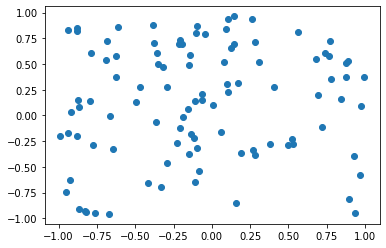

In [4]:
plt.scatter(weightMatrix[:,:,0],weightMatrix[:,:,1])

In [0]:
inputVector=np.random.uniform(-1,1,size=(1500,2))

In [6]:
inputVector

array([[-0.00793645,  0.89951595],
       [ 0.09933827, -0.93040743],
       [ 0.18852426,  0.25019316],
       ...,
       [ 0.52498135,  0.99959423],
       [ 0.47972166,  0.88314875],
       [ 0.33553197, -0.99872916]])

In [0]:
wt=np.zeros((10,10,2))
for i in range(10):
  for j in range(10):
    for k in range(2):
      wt[i][j][k]=weightMatrix[i][j][k]

In [0]:
alpha=0.1
radius=10

In [0]:
def fun(wt,inputVector,alpha,radius):

  time_constant=100000/np.log(radius)
  for iterations in range(100000):
    dist=[]
    r=radius*np.exp((-1*iterations)/time_constant)
    if(radius<0.5):
      break
    a=alpha*np.exp((-1*iterations)/time_constant)
    index=rand.randrange(0,1500)
    for i in range(wt.shape[0]):
      for j in range(wt.shape[1]):
        dist.append((np.sqrt((wt[i][j][1]-inputVector[index][1])**2 + (wt[i][j][0]-inputVector[index][0])**2),i,j))
    dist.sort()
    winX=dist[0][1]
    winY=dist[0][2]
    for i in range(10):
      for j in range(10):
        dis=np.sqrt((winX-i)**2 + (winY-j)**2)
        influence=np.exp((-1*(dis**2))/(2*(r**2)))
        wt[i][j][1]+=a*influence*(inputVector[index][1]-wt[i][j][1])
        wt[i][j][0]+=a*influence*(inputVector[index][0]-wt[i][j][0])
  return wt

In [0]:
wt=fun(wt,inputVector,alpha,radius)

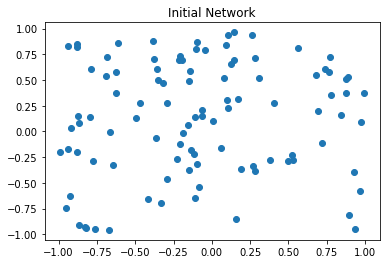

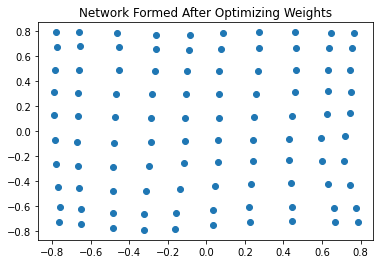

In [11]:
plt.title('Initial Network')
plt.scatter(weightMatrix[:,:,0],weightMatrix[:,:,1])
plt.show()
plt.title('Network Formed After Optimizing Weights')
plt.scatter(wt[:,:,0],wt[:,:,1])
plt.show()

In [0]:
testInput = np.array([[0.1,0.8],[0.5,-0.2],[-0.8,-0.9],[-0.06,0.9]])

In [13]:
testInput.shape

(4, 2)

In [0]:
def test(testInput):
  finalDist=[]
  for index in range(testInput.shape[0]):
    dist=[]
    for i in range(wt.shape[0]):
      for j in range(wt.shape[1]):
          dist.append((np.sqrt((wt[i][j][1]-testInput[index][1])**2 + (wt[i][j][0]-testInput[index][0])**2),i,j))
    dist.sort()
    finalDist.append((dist[0][0],dist[0][1],dist[0][2]))
  
  for i in range(len(finalDist)):
    print('For input (',testInput[i][0],',',testInput[i][1],'), the output is neuron at position (',finalDist[i][1],',',finalDist[i][2],'). Minimum Euclidean distance =',finalDist[i][0])


In [15]:
test(testInput)

For input ( 0.1 , 0.8 ), the output is neuron at position ( 4 , 0 ). Minimum Euclidean distance = 0.023499768576920783
For input ( 0.5 , -0.2 ), the output is neuron at position ( 2 , 6 ). Minimum Euclidean distance = 0.07682668126107292
For input ( -0.8 , -0.9 ), the output is neuron at position ( 9 , 9 ). Minimum Euclidean distance = 0.18307991836282358
For input ( -0.06 , 0.9 ), the output is neuron at position ( 5 , 0 ). Minimum Euclidean distance = 0.13017166057207283
